# 1. Import necessary `python` packages

In [7]:
# Import all relevant packages and functions
from utils import *

## 1.1 Visualize Benford's law

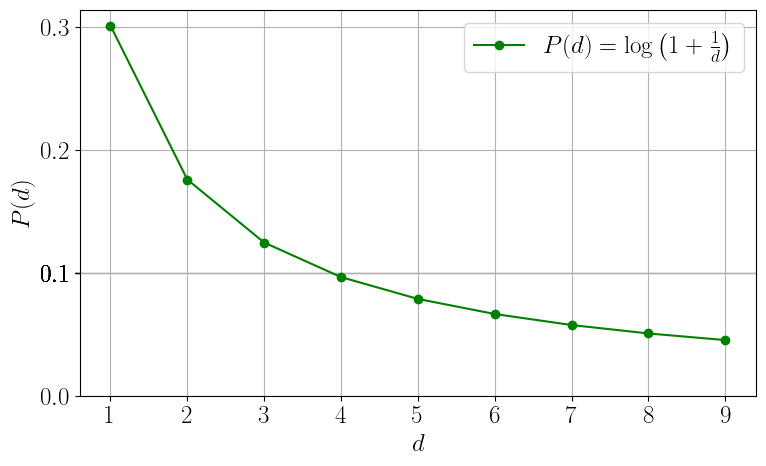

In [35]:
# Visualize Benford's law
d = np.arange(1, 10)
P = benford(d)
# Plot
plt.figure(figsize=(8, 5))
plt.plot(d, P, 'o-', color='green', label='$P(d) = \\log \\left(1 + \\frac{1}{d} \\right)$')

# Labels and styling
plt.xlabel('$d$')
plt.ylabel('$P(d)$')
plt.grid(True)
plt.xticks(d)
plt.yticks(np.round(P, 1))
plt.legend(loc='best')

# Tight layout for better spacing
plt.tight_layout()
plt.savefig('benford.svg')
plt.show()

# 2. Tests on generated datasets

## 2.1 Method 1: Sampling from uniform distributions

In [9]:
# Generate dataset using sampling from uniform distributions of various intervals
λ = np.linspace(1, 1000, 1000) # Scale factor array
dataset_m1 = []

for scale_factor in λ:
    uniform_sample = np.random.uniform(low=0.0, high=scale_factor*1.0, size=int(10000/scale_factor))
    dataset_m1.append(uniform_sample)
dataset_m1 = np.concatenate([sub_array for sub_array in dataset_m1])

In [10]:
# Find first digits in dataset
first_digits_m1 = find_first_digits(dataset_m1)

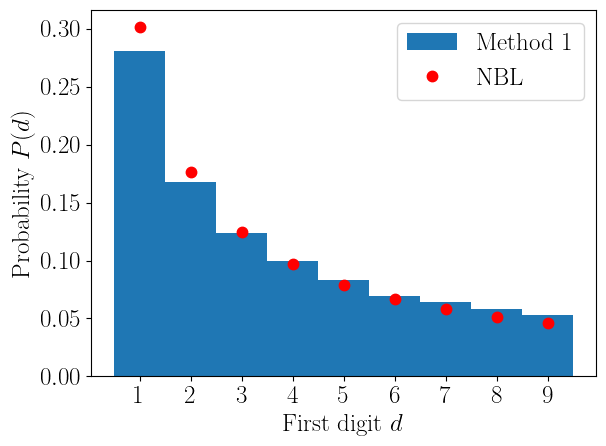

In [11]:
# Calculate Benford curve
x_benford = np.linspace(1, 9, 9)
y_benford = benford(x_benford)

# Plot results
plt.hist(first_digits_m1, bins=np.arange(0.5, 10.5, 1), density=True, align='mid', rwidth=1.0, label='Method 1')
plt.plot(x_benford, y_benford, label='NBL', marker='.', linestyle='None', markersize=15, color='red')
plt.xticks(np.arange(1, 10), labels=[str(i) for i in range(1, 10)])
plt.legend(loc='best')
plt.xlabel('First digit $d$')
plt.ylabel('Probability $P(d)$')
plt.tight_layout()
plt.savefig('gen_method_1.svg')
plt.show()

 ## 2.2 Method 2: Sampling from a logarithmic uniform distribution

In [12]:
# Generate dataset using sampling from a logarithmic uniform distribution
dataset_m2 = 10**np.random.uniform(low=-10.0, high=10.0, size=100000)

In [13]:
# Find first digits in dataset
first_digits_m2 = find_first_digits(dataset_m2)

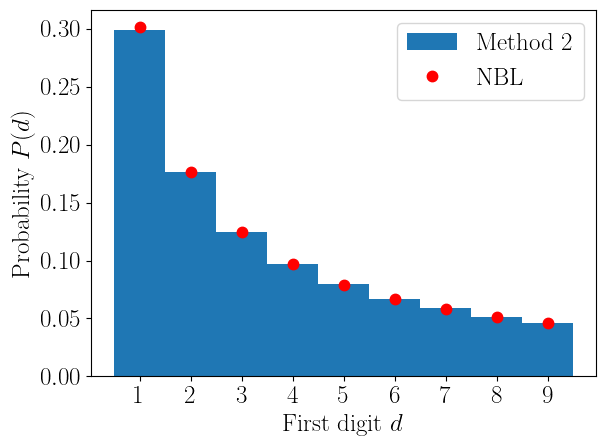

In [14]:
# Calculate Benford curve
x_benford = np.linspace(1, 9, 9)
y_benford = benford(x_benford)

# Plot results
plt.hist(first_digits_m2, bins=np.arange(0.5, 10.5, 1), density=True, align='mid', rwidth=1.0, label='Method 2')
plt.plot(x_benford, y_benford, label='NBL', marker='.', linestyle='None', markersize=15, color='red')
plt.xticks(np.arange(1, 10), labels=[str(i) for i in range(1, 10)])
plt.legend(loc='best')
plt.xlabel('First digit $d$')
plt.ylabel('Probability $P(d)$')
plt.tight_layout()
plt.savefig('gen_method_2.svg')
plt.show()

# 3. Test on data of world population

In [15]:
# Read the Excel file into a DataFrame
df = pd.read_excel("world_population.xls", sheet_name='Data', skiprows=3)

# Extract current pupulations
curr_pop = np.array(df['2022'])

# Filter NaN values
curr_pop = curr_pop[~np.isnan(curr_pop)]

In [16]:
# Extract all population numbers from 1960 to 2023
pop_1960_2023 = []
for i in df.keys()[4:]:
    pop_1960_2023.append(df[i])
pop_1960_2023 = np.array(pop_1960_2023).flatten()

# filter NaN values
pop_1960_2023 = pop_1960_2023[~np.isnan(pop_1960_2023)]

In [17]:
# Check, if numbers span many orders of magnitude for world population dataset for 2022
print(f'Minimal number in world population dataset for 2022: {round(min(curr_pop))}')
print(f'Maximal number in world population dataset for 2022: {round(max(curr_pop))}')
print(f'Orders of magnitude of numbers in world population dataset for 2022: {round(np.log10(max(curr_pop))-np.log10(min(curr_pop)),1)}\n')

# Check, if numbers span many orders of magnitude for world population dataset from 1960 to 2023
print(f'Minimal number in world population dataset from 1960 to 2023: {round(min(pop_1960_2023))}')
print(f'Maximal number in world population dataset from 1960 to 2023: {round(max(pop_1960_2023))}')
print(f'Orders of magnitude of numbers in world population dataset from 1960 to 2023: {round(np.log10(max(pop_1960_2023))-np.log10(min(pop_1960_2023)),1)}')

Minimal number in world population dataset for 2022: 11312
Maximal number in world population dataset for 2022: 7950946801
Orders of magnitude of numbers in world population dataset for 2022: 5.8

Minimal number in world population dataset from 1960 to 2023: 2646
Maximal number in world population dataset from 1960 to 2023: 7950946801
Orders of magnitude of numbers in world population dataset from 1960 to 2023: 6.5


In [18]:
# Find first digits in datasets
first_digits_curr_pop = find_first_digits(curr_pop)
first_digits_pop_1960_2023 = find_first_digits(pop_1960_2023)

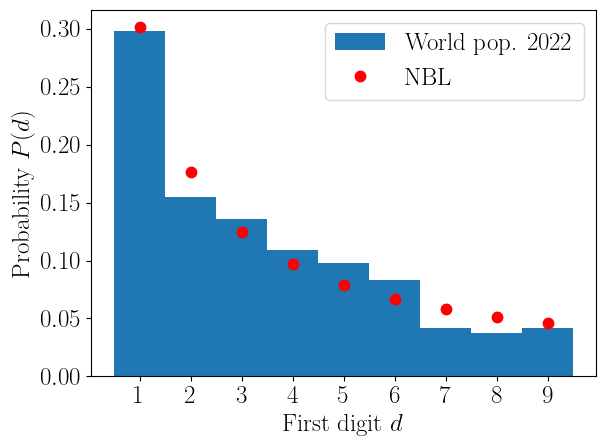

In [19]:
# Calculate Benford curve
x_benford = np.linspace(1, 9, 9)
y_benford = benford(x_benford)

# Plot results
plt.hist(first_digits_curr_pop, bins=np.arange(0.5, 10.5, 1), density=True, align='mid', rwidth=1.0, label='World pop. 2022')
plt.plot(x_benford, y_benford, label='NBL', marker='.', linestyle='None', markersize=15, color='red')
plt.xticks(np.arange(1, 10), labels=[str(i) for i in range(1, 10)])
plt.legend(loc='best')
plt.xlabel('First digit $d$')
plt.ylabel('Probability $P(d)$')
plt.tight_layout()
plt.savefig('pop_2022.svg')
plt.show()

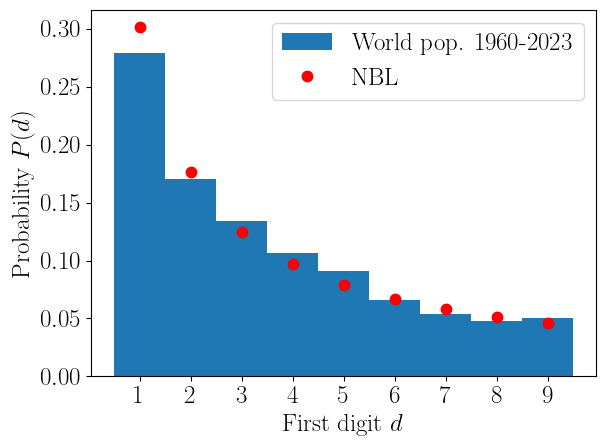

In [20]:
# Calculate Benford curve
x_benford = np.linspace(1, 9, 9)
y_benford = benford(x_benford)

# Plot results
plt.hist(first_digits_pop_1960_2023, bins=np.arange(0.5, 10.5, 1), density=True, align='mid', rwidth=1.0, label='World pop. 1960-2023')
plt.plot(x_benford, y_benford, label='NBL', marker='.', linestyle='None', markersize=15, color='red')
plt.xticks(np.arange(1, 10), labels=[str(i) for i in range(1, 10)])
plt.legend(loc='best')
plt.xlabel('First digit $d$')
plt.ylabel('Probability $P(d)$')
plt.tight_layout()
plt.savefig('pop_1960_2023.svg')
plt.show()

# 4. Test on dataset of numbers in the Bible

In [21]:
# Extract numbers from the Bible text
filepath = 'asv.txt'
bible_numbers = extract_numbers(filepath)

In [22]:
# Check, if numbers span many orders of magnitude
print(f'Minimal number in Bible numbers dataset: {min(bible_numbers)}')
print(f'Maximal number in Bible numbers dataset: {max(bible_numbers)}')
print(f'Orders of magnitude of numbers in Bible numbers dataset: {round(np.log10(max(bible_numbers))-np.log10(min(bible_numbers)+1),1)}')

Minimal number in Bible numbers dataset: 0
Maximal number in Bible numbers dataset: 800000
Orders of magnitude of numbers in Bible numbers dataset: 5.9


In [23]:
# Find first digits in datasets
first_digits_bible = find_first_digits(bible_numbers)

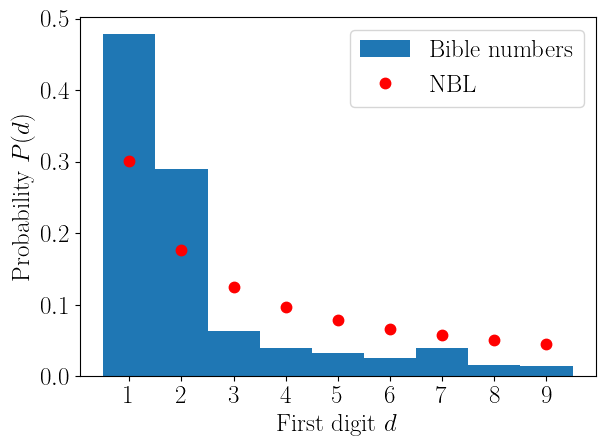

In [24]:
# Calculate Benford curve
x_benford = np.linspace(1, 9, 9)
y_benford = benford(x_benford)

# Plot results
plt.hist(first_digits_bible, bins=np.arange(0.5, 10.5, 1), density=True, align='mid', rwidth=1.0, label='Bible numbers')
plt.plot(x_benford, y_benford, label='NBL', marker='.', linestyle='None', markersize=15, color='red')
plt.xticks(np.arange(1, 10), labels=[str(i) for i in range(1, 10)])
plt.legend(loc='best')
plt.xlabel('First digit $d$')
plt.ylabel('Probability $P(d)$')
plt.tight_layout()
plt.savefig('bible_numbers.svg')
plt.show()